In [3]:
from pymongo import MongoClient
from datetime import datetime
import sys
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt

In [9]:
forum = 'physics'
print(f'Forum: {forum}')

client = MongoClient()
db = client.titlewave
posts = db[f'{forum}.posts']

total_posts = posts.count_documents({})
print(f'{total_posts} posts found...')

Forum: physics
174174 posts found...


In [15]:
# Count posts by year
start_time = time()
result = posts.aggregate([{'$group': {'_id': {'$year': '$CreationDate'},
                                      'NumPosts': {'$sum': 1},
                                      'AvgViews': {'$avg': '$ViewCount'},
                                      'AnswerProbability': {'$avg': {'$cond': [{'$gt': ['$AnswerCount', 0]}, 1, 0]}}}},
                          {'$sort': {'_id': 1}}
                          ])
result = list(result)
df = pd.DataFrame(result)
print(f'Duration: {time() - start_time:.2f} s')
df

Duration: 0.20 s


,_id,NumPosts,AvgViews,AnswerProbability
0,2010,619,9048.597738,0.993538
1,2011,5373,4946.588312,0.960357
2,2012,7466,4064.618805,0.936914
3,2013,12246,3301.392455,0.891965
4,2014,17611,2323.911305,0.862302
5,2015,19884,1562.369543,0.850785
6,2016,21770,1025.607304,0.834543
7,2017,21013,754.949936,0.844001
8,2018,20725,438.546683,0.826731
9,2019,21731,250.174267,0.777047


Duration: 0.17 s


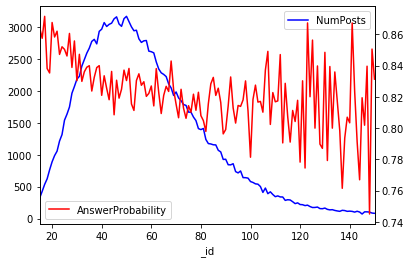

In [18]:
# Analyze posts by title length
start_time = time()
result = posts.aggregate([{'$group': {'_id': {'$strLenCP': '$Title'},
                                      'NumPosts': {'$sum': 1},
                                      'AvgViews': {'$avg': '$ViewCount'},
                                      'AnswerProbability': {'$avg': {'$cond': [{'$gt': ['$AnswerCount', 0]}, 1, 0]}}}},
                          {'$sort': {'_id': 1}}
                          ])
result = list(result)
df = pd.DataFrame(result)
print(f'Duration: {time() - start_time:.2f} s')

# Plot the results
fig, ax = plt.subplots()
df.plot(x='_id', y='NumPosts', ax = ax, color='blue')
df.plot(x='_id', y='AnswerProbability', ax = ax.twinx(), color='red')
plt.show()

In [24]:
# Analyze posts by tag

start_time = time()
result = posts.aggregate([{'$project': {'Title': False, 'Body': False}},
                          {'$unwind': '$Tags'},
                          {'$group': {'_id': '$Tags',
                                      'NumPosts': {'$sum': 1},
                                      'AvgViews': {'$avg': '$ViewCount'},
                                      'AnswerProbability': {'$avg': {'$cond': [{'$gt': ['$AnswerCount', 0]}, 1, 0]}}}},
                          {'$sort': {'NumPosts': -1}}
                          ])
result = list(result)
df = pd.DataFrame(result)
print(f'Duration: {time() - start_time:.2f} s')
df.head(20)


Duration: 0.32 s


,_id,NumPosts,AvgViews,AnswerProbability
0,quantum-mechanics,22027,865.869569,0.814773
1,homework-and-exercises,18848,1294.154393,0.860410
2,newtonian-mechanics,14555,1657.260392,0.920302
3,electromagnetism,13028,1240.908428,0.823073
4,thermodynamics,10418,1768.643790,0.842868
5,quantum-field-theory,9698,639.228707,0.723139
6,general-relativity,9551,787.179876,0.800440
7,special-relativity,7689,925.147223,0.864482
8,forces,6412,1897.690892,0.915159
9,classical-mechanics,6195,1084.020985,0.828087
